In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


In [9]:
california = fetch_california_housing(as_frame=True)

In [10]:
df = california.frame

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
# Check for missing values
print(df.isnull().sum())


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [15]:
import seaborn as sns

In [16]:
import matplotlib.pyplot as plt

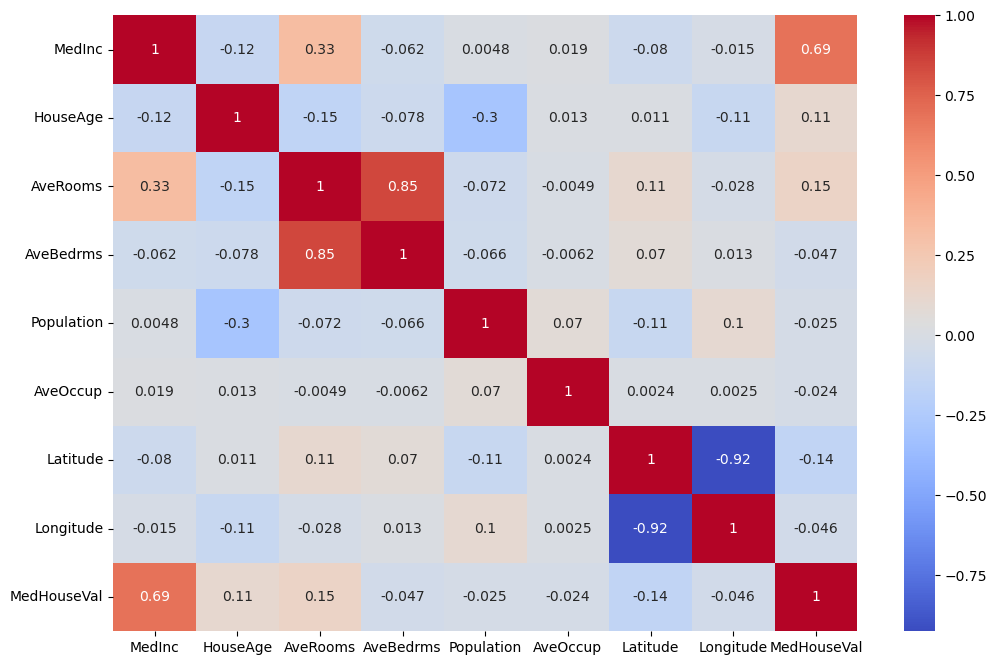

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('MedHouseVal', axis=1)  # Features
X = df.drop('AveRooms', axis=1)  # Features
y = df['MedHouseVal']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
from sklearn.metrics import mean_absolute_percentage_error


Mean Squared Error: 4.953771188778578e-30
R-squared: 1.0
Mean Absolute Percentage Error (MAPE): 0.00%


In [37]:
# Feature Importance
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


              Coefficient
MedInc       1.721518e-15
HouseAge    -6.674830e-16
AveBedrms   -5.219192e-16
Population  -1.227226e-15
AveOccup     1.416962e-16
Latitude    -1.692328e-15
Longitude   -2.300914e-15
MedHouseVal  1.156191e+00


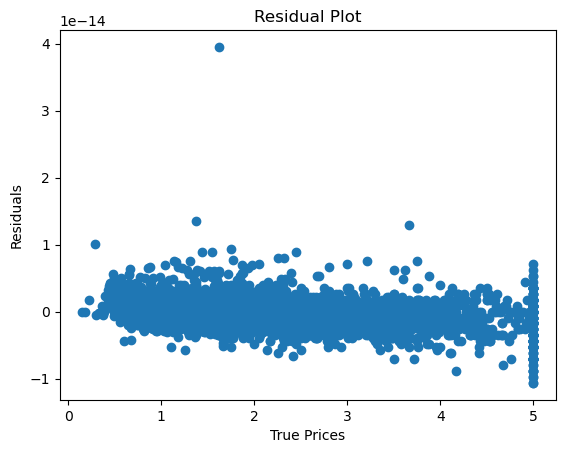

In [38]:
# Residual plot
plt.scatter(y_test, y_test - y_pred)
plt.xlabel('True Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [41]:
import joblib

# Save the model
joblib.dump(model, 'california_house_price_prediction_model.pkl')


['california_house_price_prediction_model.pkl']